# Pokémon Data Science

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import copy

In [178]:
# Pokemon data
df = pd.read_csv('https://raw.githubusercontent.com/Fnor-BE/pokemon-data-scraper/main/pokemons.csv', index_col=[0])
# Type chart
df_types = pd.read_csv('https://raw.githubusercontent.com/Fnor-BE/pokemon-data-scraper/main/pokemon-type-chart.csv', index_col=[0])

In [179]:
# Reorder columns and rows alphabetically
df_types = df_types.reindex(index=sorted(df_types.index), columns=sorted(df_types.columns))

In [180]:
TYPE_COLORS = {
    'bug': '#A6B91A',
    'dark': '#705746',
    'dragon': '#6F35FC',
    'electric': '#F7D02C',
    'fairy': '#D685AD',
    'fighting': '#C22E28',
    'fire': '#EE8130',
    'flying': '#A98FF3',
    'ghost': '#735797',
    'grass': '#7AC74C',
    'ground': '#E2BF65',
    'ice': '#96D9D6',
    'normal': '#A8A77A',
    'poison': '#A33EA1',
    'psychic': '#F95587',
    'rock': '#B6A136',
    'steel': '#B7B7CE',
    'water': '#6390F0'
}
type_color_palette = sns.color_palette(TYPE_COLORS.values(), len(TYPE_COLORS))

In [181]:
df_types

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fighting,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
bug,1.0,2.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1,0.5,2.0,1.0,0.5,1.0
dark,1.0,0.5,1.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1,1.0,2.0,1.0,1.0,1.0
dragon,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,0.5,1.0
electric,1.0,1.0,0.5,0.5,1.0,1.0,1.0,2.0,1.0,0.5,0.0,1.0,1,1.0,1.0,1.0,1.0,2.0
fairy,1.0,2.0,2.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1,0.5,1.0,1.0,0.5,1.0
fighting,0.5,2.0,1.0,1.0,0.5,1.0,1.0,0.5,0.0,1.0,1.0,2.0,2,0.5,0.5,2.0,2.0,1.0
fire,2.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,2.0,1,1.0,1.0,0.5,2.0,0.5
flying,2.0,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1,1.0,1.0,0.5,0.5,1.0
ghost,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0,1.0,2.0,1.0,1.0,1.0
grass,0.5,1.0,0.5,1.0,1.0,1.0,0.5,0.5,1.0,0.5,2.0,1.0,1,0.5,1.0,2.0,0.5,2.0


# Sorting functions

## Type tuples
Since Water/Ice is the same as Ice/Water, we'll create a tuple with the types in alphabetical order.
Pure types will be noted Water/Water.

In [182]:
mask = df['type2'].isna()
df.loc[mask, 'type1_sorted'] = df.loc[mask, 'type1']
df.loc[mask, 'type2_sorted'] = df.loc[mask, 'type1']

mask = (~df['type2'].isna()) & (df['type1'] < df['type2'])
df.loc[mask, 'type1_sorted'] = df.loc[mask, 'type1']
df.loc[mask, 'type2_sorted'] = df.loc[mask, 'type2']

mask = (~df['type2'].isna()) & (df['type1'] > df['type2'])
df.loc[mask, 'type1_sorted'] = df.loc[mask, 'type2']
df.loc[mask, 'type2_sorted'] = df.loc[mask, 'type1']

df['type_tuple'] = '(' + df['type1_sorted'] + ', ' + df['type2_sorted'] + ')'

## Is Mega Evolution

In [183]:
df['is_mega'] = 0
df.loc[ df['form'].str.contains('mega', case=False, na=False), 'is_mega' ] = 1

## Remove duplicates

In [184]:
# df_mega = 
df_unique_types = df.drop_duplicates(subset=['name', 'type1', 'type2'])
df_unique_types = df_unique_types[ df_unique_types['is_mega'] == 0 ]
df_unique_types

,id,name,form,gen,type1,type2,stats,hp,attack,defense,...,evo_1_details,evo_2,evo_3,evo_2_details,evo_stage,evo_is_final,type1_sorted,type2_sorted,type_tuple,is_mega
0,1,Bulbasaur,NaN,1,grass,poison,318,45,49,49,...,Level 16,Ivysaur,Venusaur,Level 32,1.0,0,grass,poison,"(grass, poison)",0
1,2,Ivysaur,NaN,1,grass,poison,405,60,62,63,...,Level 16,Ivysaur,Venusaur,Level 32,2.0,0,grass,poison,"(grass, poison)",0
2,3,Venusaur,NaN,1,grass,poison,525,80,82,83,...,Level 16,Ivysaur,Venusaur,Level 32,3.0,1,grass,poison,"(grass, poison)",0
3,4,Charmander,NaN,1,fire,NaN,309,39,52,43,...,Level 16,Charmeleon,Charizard,Level 36,1.0,0,fire,fire,"(fire, fire)",0
4,5,Charmeleon,NaN,1,fire,NaN,405,58,64,58,...,Level 16,Charmeleon,Charizard,Level 36,2.0,0,fire,fire,"(fire, fire)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1021,Raging Bolt,NaN,9,electric,dragon,590,125,73,91,...,NaN,NaN,NaN,NaN,1.0,1,dragon,electric,"(dragon, electric)",0
1193,1022,Iron Boulder,NaN,9,rock,psychic,590,90,120,80,...,NaN,NaN,NaN,NaN,1.0,1,psychic,rock,"(psychic, rock)",0
1194,1023,Iron Crown,NaN,9,steel,psychic,590,90,72,100,...,NaN,NaN,NaN,NaN,1.0,1,psychic,steel,"(psychic, steel)",0
1195,1024,Terapagos,Normal Form,9,normal,NaN,450,90,65,85,...,NaN,NaN,NaN,NaN,1.0,1,normal,normal,"(normal, normal)",0


## Pokemons by type

In [185]:
def get_pokemon_by_types(type1: str, type2: str=None, pure_type=False, data=None):
    if data is None:
        data = df
    mask1 = data['type1'] == type1
    if type2 is not None:
        mask1 &= data['type2'] == type2
    
    mask2 = data['type2'] == type1
    if type2 is not None:
        mask2 &= data['type1'] == type2
    
    mask = mask1 | mask2
    if pure_type:
        mask &= data['type2'].isna()
        
    return data.loc[mask,:]

test = get_pokemon_by_types('normal')['id'].count()
test2 = get_pokemon_by_types('water')['id'].count()
print(test, test2)

148 171


# Type Study

In [186]:
final_evos = df_unique_types[ df_unique_types['evo_is_final'] == 1 ]
type_distribution = final_evos.groupby(['type1', 'type2'], dropna=False)['id'].count().unstack()
type_distribution

type2,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water,NaN
type1,,,,,,,,,,,,,,,,,,,
bug,NaN,1.0,NaN,2.0,1.0,4.0,1.0,9.0,1.0,3.0,1.0,NaN,NaN,5.0,2.0,3.0,6.0,1.0,6.0
dark,NaN,NaN,2.0,NaN,1.0,1.0,2.0,5.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,NaN,1.0,NaN,9.0
dragon,NaN,1.0,NaN,1.0,NaN,1.0,1.0,4.0,1.0,NaN,2.0,2.0,1.0,NaN,2.0,NaN,NaN,1.0,4.0
electric,NaN,1.0,3.0,NaN,2.0,1.0,1.0,6.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,NaN,2.0,1.0,19.0
fairy,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,11.0
fighting,NaN,2.0,1.0,1.0,NaN,NaN,1.0,2.0,2.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,2.0,2.0,15.0
fire,1.0,1.0,2.0,NaN,NaN,3.0,NaN,5.0,5.0,NaN,1.0,NaN,1.0,1.0,3.0,2.0,1.0,1.0,13.0
flying,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
ghost,NaN,1.0,1.0,NaN,2.0,NaN,1.0,2.0,NaN,4.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8.0


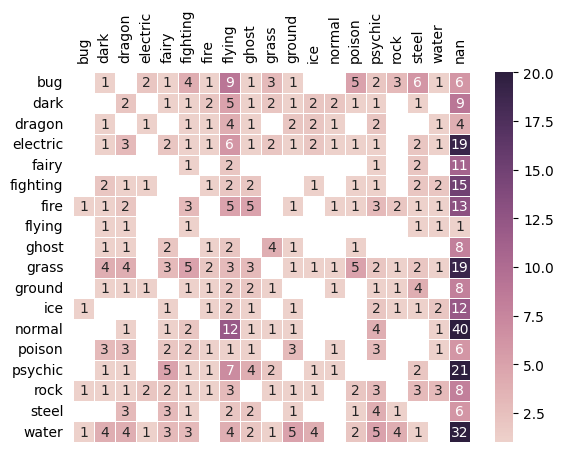

In [187]:
ax = sns.heatmap(type_distribution, vmin=1, vmax=20, annot=True, linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.xaxis.set_tick_params(rotation=90)
ax.tick_params(left=False, top=False)

This is workable, however a pokemon having the type Water/Ice has the exact same properties as one having Ice/Water. As such, we will reorganize the numbers so that the first type is always the first in alphabetical order. We will also move the signel type pokemon to the diagonal, effectively putting a pure Water into Water/Water. The result will be a map with the upper right populated.

In [188]:
type_distribution_sorted = copy(type_distribution)
types = type_distribution.drop(columns=[np.nan]).columns

for i, type1 in enumerate(types):
    type_distribution_sorted.loc[type1, type1] = type_distribution_sorted[np.nan][type1]
    for j, type2 in enumerate(types):
        if i <= j:
            break
        type_distribution_sorted.loc[type2, type1] = np.nan_to_num(type_distribution_sorted.loc[type2, type1]) + np.nan_to_num(type_distribution_sorted.loc[type1, type2])
        if type_distribution_sorted.loc[type2, type1] == 0:
            type_distribution_sorted.loc[type2, type1] = np.nan
        type_distribution_sorted.loc[type1, type2] = np.nan

type_distribution_sorted.drop(columns=[np.nan], inplace=True)
type_distribution_sorted

type2,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
type1,,,,,,,,,,,,,,,,,,
bug,6.0,1.0,NaN,2.0,1.0,4.0,2.0,9.0,1.0,3.0,1.0,1.0,NaN,5.0,2.0,4.0,6.0,2.0
dark,NaN,9.0,3.0,1.0,1.0,3.0,3.0,6.0,2.0,6.0,2.0,2.0,2.0,4.0,2.0,1.0,1.0,4.0
dragon,NaN,NaN,4.0,4.0,NaN,2.0,3.0,5.0,2.0,4.0,3.0,2.0,2.0,3.0,3.0,1.0,3.0,5.0
electric,NaN,NaN,NaN,19.0,2.0,2.0,1.0,6.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
fairy,NaN,NaN,NaN,NaN,11.0,1.0,NaN,2.0,2.0,3.0,NaN,1.0,1.0,2.0,6.0,2.0,5.0,3.0
fighting,NaN,NaN,NaN,NaN,NaN,15.0,4.0,3.0,2.0,5.0,1.0,1.0,2.0,3.0,2.0,1.0,3.0,5.0
fire,NaN,NaN,NaN,NaN,NaN,NaN,13.0,5.0,6.0,2.0,2.0,1.0,1.0,2.0,4.0,3.0,1.0,1.0
flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,3.0,2.0,2.0,12.0,1.0,7.0,3.0,3.0,5.0
ghost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,7.0,3.0,1.0,1.0,2.0,4.0,NaN,2.0,2.0


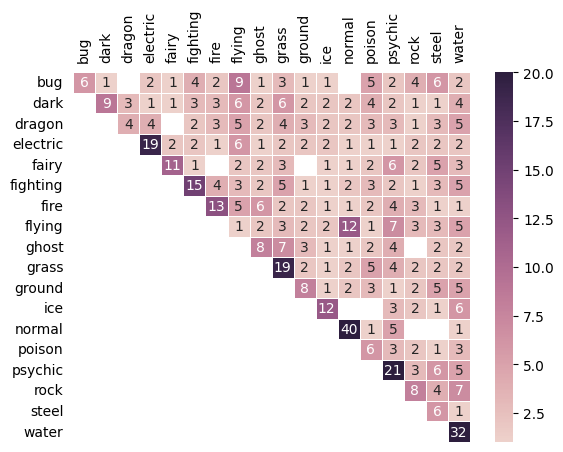

In [189]:
ax = sns.heatmap(type_distribution_sorted, vmin=1, vmax=20, annot=True, linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.xaxis.set_tick_params(rotation=90)
ax.tick_params(left=False, top=False)

In [190]:
final_evos.loc[~final_evos['type2'].isna(), 'type_tuple'].value_counts().head(10)

type_tuple
(flying, normal)      12
(bug, flying)          9
(rock, water)          7
(flying, psychic)      7
(ghost, grass)         7
(electric, flying)     6
(ice, water)           6
(fairy, psychic)       6
(dark, flying)         6
(dark, grass)          6
Name: count, dtype: int64

## Type resistances and weaknesses

The table below display the attack type as a row and the defending type in the column.

Since we work with rows, we'll need to transpose it.

In [191]:
df_types

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fighting,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
bug,1.0,2.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1,0.5,2.0,1.0,0.5,1.0
dark,1.0,0.5,1.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1,1.0,2.0,1.0,1.0,1.0
dragon,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,0.5,1.0
electric,1.0,1.0,0.5,0.5,1.0,1.0,1.0,2.0,1.0,0.5,0.0,1.0,1,1.0,1.0,1.0,1.0,2.0
fairy,1.0,2.0,2.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1,0.5,1.0,1.0,0.5,1.0
fighting,0.5,2.0,1.0,1.0,0.5,1.0,1.0,0.5,0.0,1.0,1.0,2.0,2,0.5,0.5,2.0,2.0,1.0
fire,2.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,2.0,1,1.0,1.0,0.5,2.0,0.5
flying,2.0,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1,1.0,1.0,0.5,0.5,1.0
ghost,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0,1.0,2.0,1.0,1.0,1.0
grass,0.5,1.0,0.5,1.0,1.0,1.0,0.5,0.5,1.0,0.5,2.0,1.0,1,0.5,1.0,2.0,0.5,2.0


In [192]:
r_df_types = df_types.T
r_df_types

,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
against_bug,1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0
against_dark,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
against_dragon,1.0,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5
against_electric,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
against_fairy,0.5,0.5,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
against_fighting,0.5,0.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0
against_fire,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
against_flying,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,0.5,0.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
against_ghost,0.5,2.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.5,1.0,1.0,1.0,1.0
against_grass,2.0,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,0.5,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5


In [209]:
r_df_types['steel']

against_bug         1.0
against_dark        1.0
against_dragon      1.0
against_electric    0.5
against_fairy       2.0
against_fighting    1.0
against_fire        0.5
against_flying      1.0
against_ghost       1.0
against_grass       1.0
against_ground      1.0
against_ice         2.0
against_normal      1.0
against_poison      1.0
against_psychic     1.0
against_rock        2.0
against_steel       0.5
against_water       0.5
Name: steel, dtype: float64

In [194]:
dual_type_matrix = pd.DataFrame(columns=df_types.columns)
dual_type_matrix.insert(loc=0, column='type_tuple', value=np.nan)
# dual_type_matrix.insert(loc=1, column='nb_pokemon', value=np.nan)

for type1 in r_df_types.columns:
    for type2 in r_df_types.columns:
        if type1 > type2:
            continue
        if type1 == type2:
            resistance = r_df_types[type1]
        else:
            resistance = r_df_types[type1] * r_df_types[type2]
        tuple = f'({type1}, {type2})'
        resistance.loc['type_tuple'] = tuple
        # resistance.loc['nb_pokemon'] = df_unique_types[ df_unique_types['type_tuple'] == tuple ]['name'].count()
        dual_type_matrix.loc[ len(dual_type_matrix.index) ] = resistance
dual_type_matrix

,type_tuple,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fighting,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,"(bug, bug)",1.0,2.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1.0,0.5,2.0,1.0,0.5,1.0
1,"(bug, dark)",1.0,1.0,1.0,1.0,0.25,0.25,0.5,0.5,1.0,2.0,1.0,1.0,1.0,0.5,4.0,1.0,0.5,1.0
2,"(bug, dragon)",1.0,2.0,2.0,1.0,0.0,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1.0,0.5,2.0,1.0,0.25,1.0
3,"(bug, electric)",1.0,2.0,0.5,0.5,0.5,0.5,0.5,1.0,0.5,1.0,0.0,1.0,1.0,0.5,2.0,1.0,0.5,2.0
4,"(bug, fairy)",1.0,4.0,2.0,1.0,0.5,1.0,0.25,0.5,0.5,2.0,1.0,1.0,1.0,0.25,2.0,1.0,0.25,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"(rock, steel)",2.0,1.0,1.0,0.5,2.0,0.5,1.0,2.0,1.0,1.0,0.5,4.0,1.0,1.0,1.0,2.0,0.25,0.5
167,"(rock, water)",2.0,1.0,0.5,1.0,1.0,0.5,4.0,2.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,2.0,0.5,0.5
168,"(steel, steel)",1.0,1.0,1.0,0.5,2.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,0.5,0.5
169,"(steel, water)",1.0,1.0,0.5,0.5,2.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,1.0,1.0,4.0,0.5,0.25


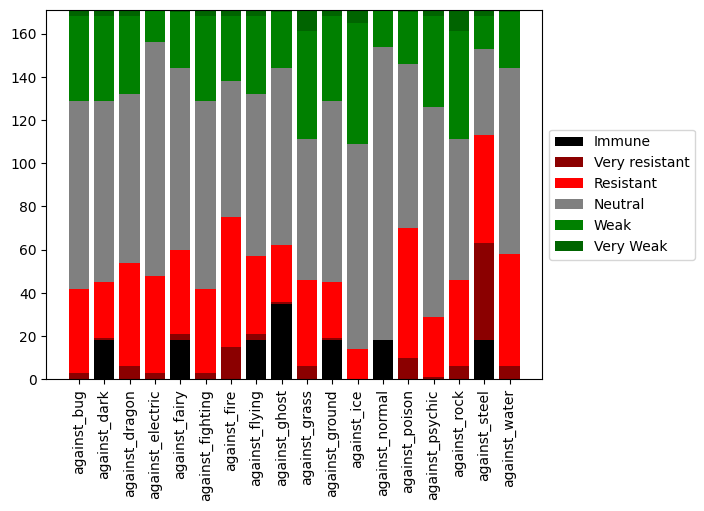

In [208]:
resistances = {
    0.0:    'Immune',
    0.25:   'Very resistant',
    0.5:    'Resistant',
    1.0:    'Neutral',
    2.0:    'Weak',
    4.0:    'Very Weak',
}
colors = [
    'black',
    'darkred',
    'red',
    'grey',
    'green',
    'darkgreen',
]

matrix = {}

for key, name in resistances.items():
    matrix[name] = []
    for type in df_types.columns:
        count = dual_type_matrix[type].value_counts(ascending=False)
        if key in count:
            matrix[name].append(int(count[key]))
        else:
            matrix[name].append(0)

ground = [0] * 18
for color, values in zip(colors, matrix.values()):
    plt.bar(x=df_types.columns, height=values, bottom=ground, color=color)
    ground = [a + b for a,b in zip(ground, values)]            
    
plt.legend(resistances.values(), loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.xticks(rotation=90)
plt.show()

In [196]:
df_resistances = copy(df_unique_types)
df_resistances = df_resistances.merge(dual_type_matrix, on='type_tuple')

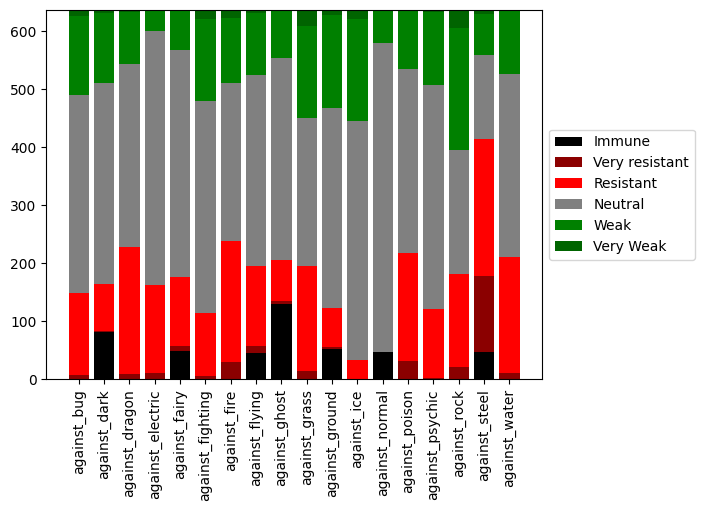

In [197]:
resistances = {
    0.0:    'Immune',
    0.25:   'Very resistant',
    0.5:    'Resistant',
    1.0:    'Neutral',
    2.0:    'Weak',
    4.0:    'Very Weak',
}
colors = [
    'black',
    'darkred',
    'red',
    'grey',
    'green',
    'darkgreen',
]

matrix = {}

for key, name in resistances.items():
    matrix[name] = []
    for type in df_types.columns:
        count = df_resistances.loc[ df_resistances['evo_is_final'] == 1, type].value_counts(ascending=False)
        if key in count:
            matrix[name].append(int(count[key]))
        else:
            matrix[name].append(0)

ground = [0] * 18
for color, values in zip(colors, matrix.values()):
    plt.bar(x=df_types.columns, height=values, bottom=ground, color=color)
    ground = [a + b for a,b in zip(ground, values)]            
    
plt.legend(resistances.values(), loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.xticks(rotation=90)
plt.show()

# Number of pokemons per type

In [198]:
df

,id,name,form,gen,type1,type2,stats,hp,attack,defense,...,evo_1_details,evo_2,evo_3,evo_2_details,evo_stage,evo_is_final,type1_sorted,type2_sorted,type_tuple,is_mega
0,1,Bulbasaur,NaN,1,grass,poison,318,45,49,49,...,Level 16,Ivysaur,Venusaur,Level 32,1.0,0,grass,poison,"(grass, poison)",0
1,2,Ivysaur,NaN,1,grass,poison,405,60,62,63,...,Level 16,Ivysaur,Venusaur,Level 32,2.0,0,grass,poison,"(grass, poison)",0
2,3,Venusaur,NaN,1,grass,poison,525,80,82,83,...,Level 16,Ivysaur,Venusaur,Level 32,3.0,1,grass,poison,"(grass, poison)",0
3,4,Charmander,NaN,1,fire,NaN,309,39,52,43,...,Level 16,Charmeleon,Charizard,Level 36,1.0,0,fire,fire,"(fire, fire)",0
4,5,Charmeleon,NaN,1,fire,NaN,405,58,64,58,...,Level 16,Charmeleon,Charizard,Level 36,2.0,0,fire,fire,"(fire, fire)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1023,Iron Crown,NaN,9,steel,psychic,590,90,72,100,...,NaN,NaN,NaN,NaN,1.0,1,psychic,steel,"(psychic, steel)",0
1195,1024,Terapagos,Normal Form,9,normal,NaN,450,90,65,85,...,NaN,NaN,NaN,NaN,1.0,1,normal,normal,"(normal, normal)",0
1196,1024,Terapagos,Terastal Form,9,normal,NaN,600,95,95,110,...,NaN,NaN,NaN,NaN,1.0,1,normal,normal,"(normal, normal)",0
1197,1024,Terapagos,Stellar Form,9,normal,NaN,700,160,105,110,...,NaN,NaN,NaN,NaN,1.0,1,normal,normal,"(normal, normal)",0


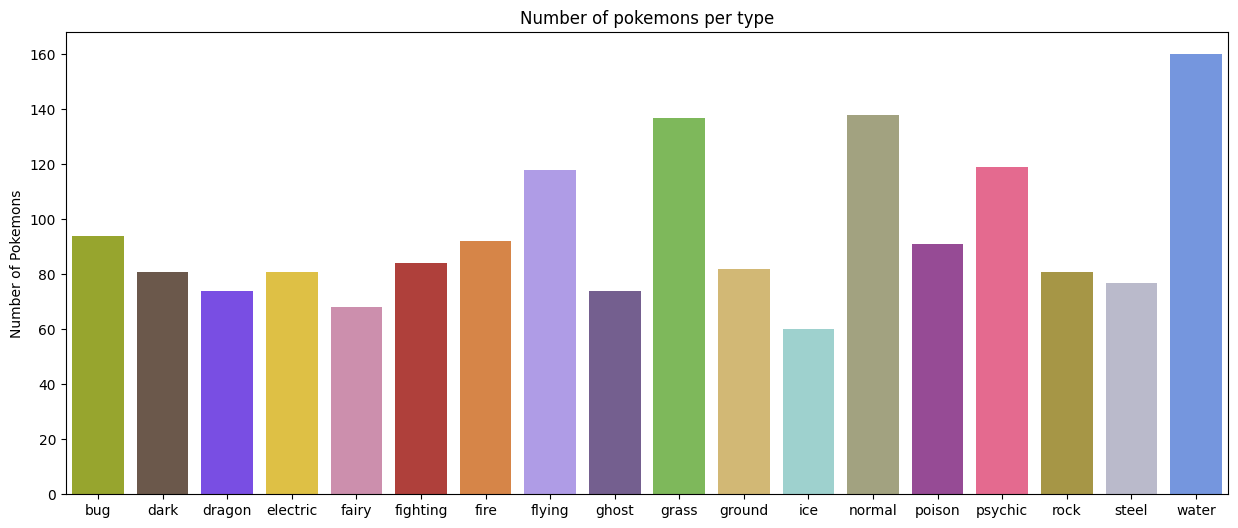

In [207]:
count_pokemons_per_type = {}

for type in df_types.index:
    count_pokemons_per_type[type] = get_pokemon_by_types(type, data=df_unique_types)['id'].count()
df_count = pd.DataFrame.from_dict(count_pokemons_per_type, orient='index', columns=['count'])
df_count['type'] = df_count.index

plt.figure(figsize=(15, 6))
sns.barplot(
    data = df_count,
    x = 'type',
    y = 'count',
    hue = 'type',
    palette=type_color_palette
)
# capitalized_types = [a.capitalize() for a in df_types.index]
# plt.xticks(labels=capitalized_types)
plt.xlabel('')
plt.ylabel('Number of Pokemons')
plt.title('Number of pokemons per type')
plt.show()

In [200]:
df_types.reindex(index=sorted(df_types.index), columns=sorted(df_types.columns))

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fighting,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
bug,1.0,2.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1,0.5,2.0,1.0,0.5,1.0
dark,1.0,0.5,1.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1,1.0,2.0,1.0,1.0,1.0
dragon,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,0.5,1.0
electric,1.0,1.0,0.5,0.5,1.0,1.0,1.0,2.0,1.0,0.5,0.0,1.0,1,1.0,1.0,1.0,1.0,2.0
fairy,1.0,2.0,2.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1,0.5,1.0,1.0,0.5,1.0
fighting,0.5,2.0,1.0,1.0,0.5,1.0,1.0,0.5,0.0,1.0,1.0,2.0,2,0.5,0.5,2.0,2.0,1.0
fire,2.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,2.0,1,1.0,1.0,0.5,2.0,0.5
flying,2.0,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1,1.0,1.0,0.5,0.5,1.0
ghost,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0,1.0,2.0,1.0,1.0,1.0
grass,0.5,1.0,0.5,1.0,1.0,1.0,0.5,0.5,1.0,0.5,2.0,1.0,1,0.5,1.0,2.0,0.5,2.0


In [247]:
types_per_gen = pd.DataFrame()

for type in types:
    count = get_pokemon_by_types(type, data=final_evos).groupby('gen')['id'].count()
    types_per_gen[type] = count
types_per_gen = types_per_gen.fillna(0)

,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
1,5.0,0.0,1.0,4.0,3.0,4.0,6.0,12.0,1.0,5.0,6.0,5.0,11.0,12.0,9.0,4.0,0.0,15.0
2,11.0,3.0,2.0,7.0,5.0,6.0,11.0,22.0,1.0,10.0,9.0,6.0,16.0,15.0,16.0,9.0,4.0,27.0
3,19.0,10.0,8.0,10.0,7.0,10.0,15.0,31.0,4.0,17.0,15.0,10.0,25.0,18.0,28.0,16.0,9.0,42.0
4,26.0,16.0,12.0,20.0,8.0,14.0,19.0,42.0,11.0,28.0,23.0,16.0,35.0,22.0,34.0,20.0,18.0,51.0
5,35.0,22.0,18.0,27.0,9.0,25.0,28.0,53.0,15.0,38.0,29.0,20.0,45.0,25.0,43.0,25.0,25.0,60.0
6,36.0,27.0,23.0,29.0,18.0,28.0,33.0,58.0,20.0,43.0,32.0,22.0,49.0,26.0,48.0,30.0,27.0,64.0
7,42.0,32.0,30.0,37.0,29.0,35.0,39.0,65.0,30.0,51.0,35.0,25.0,57.0,31.0,59.0,35.0,37.0,72.0
8,46.0,41.0,38.0,45.0,37.0,46.0,45.0,72.0,39.0,60.0,39.0,35.0,64.0,38.0,72.0,41.0,44.0,81.0
9,50.0,53.0,49.0,53.0,43.0,59.0,54.0,77.0,48.0,74.0,45.0,39.0,73.0,47.0,82.0,47.0,52.0,91.0


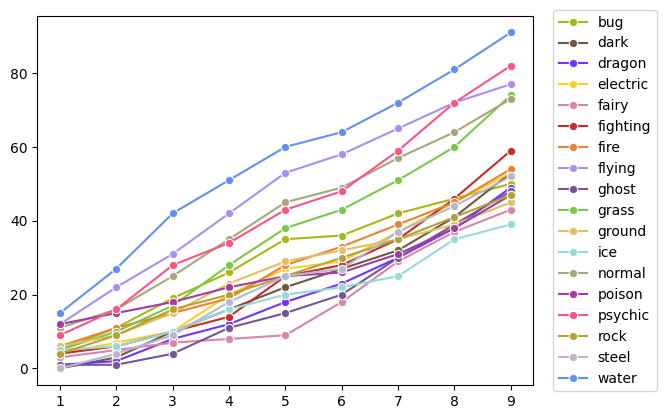

In [248]:
sum_types_per_gen = pd.DataFrame()
tpg = types_per_gen.T

for gen in types_per_gen.index:
    if gen == 1:
        sum_types_per_gen[1] = tpg[1]
        continue
    
    sum_types_per_gen[gen] = sum_types_per_gen[gen-1] + tpg[gen]
    
sns.lineplot(data=sum_types_per_gen.T, palette=type_color_palette, dashes=False, marker="o")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
sum_types_per_gen.T

<Figure size 1500x600 with 0 Axes>

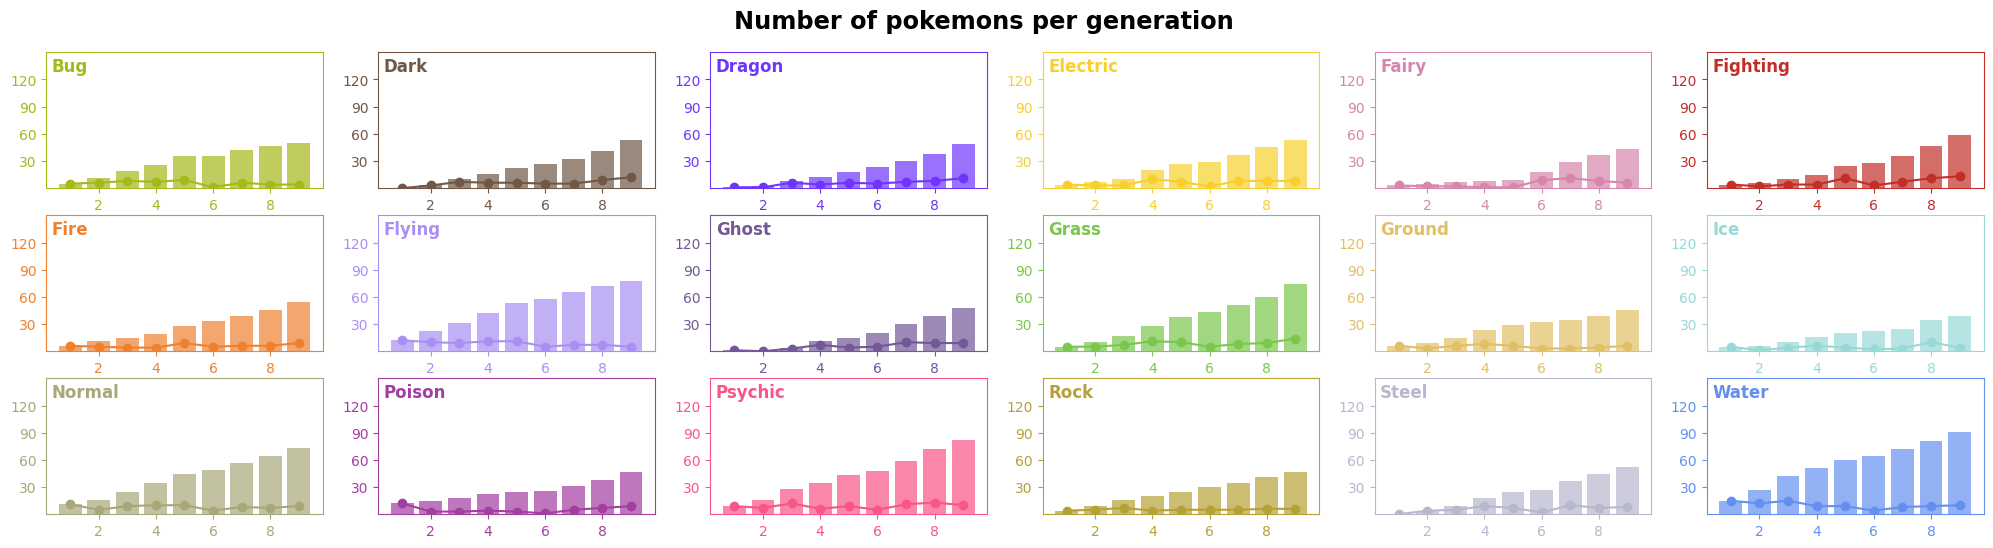

In [249]:
plt.figure(figsize=(15, 6))
fig, axs = plt.subplots(3, 6, figsize=(25, 6))

COLUMNS = 6

def change_graph_color(ax, color):
    ax.spines['top'].set_color(color)
    ax.spines['right'].set_color(color)
    ax.spines['bottom'].set_color(color)
    ax.spines['left'].set_color(color)
    ax.xaxis.label.set_color(color)
    ax.yaxis.label.set_color(color)
    ax.tick_params(color=color, labelcolor=color)

for i, type in enumerate(types):
    x = i // COLUMNS
    y = i % COLUMNS
    color = TYPE_COLORS[type]
    ax = axs[x,y]
    ax.bar(types_per_gen.index, sum_types_per_gen.T[type], alpha=0.7, color=color)
    ax.plot(types_per_gen.index, types_per_gen[type], marker='o', color=color)
    ax.set_title(type.capitalize(), fontweight="bold", loc='left', x=0.02, y=0.8, color=color)
    ax.set_ylim(0,150)
    ax.set_yticks([30,60,90,120], ['30','60','90','120'])
    change_graph_color(ax,color)
    
fig.text(0.5, 0.92, 'Number of pokemons per generation',
         horizontalalignment='center', color='black', weight='bold', size='xx-large');

In [220]:
types_per_gen.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='gen')